In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio("/content/cell_images", output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values


Copying files: 27560 files [00:06, 4493.16 files/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from tensorflow.keras.layers import *

train_dir ='/content/output/train' 
test_dir = '/content/output/test'
val_dir = '/content/output/val'

size = 50
cmode = "sparse"

train_gen = ImageDataGenerator(
    rescale=1 / 255.0 )
train_ds = train_gen.flow_from_directory(train_dir, target_size=(size, size), class_mode=cmode, batch_size=32)


val_gen = ImageDataGenerator(rescale=1 / 255.0)
val_ds = val_gen.flow_from_directory(val_dir, target_size=(size, size),  class_mode=cmode, batch_size=32)

test_gen = ImageDataGenerator(rescale=1 / 255.0)
test_ds = test_gen.flow_from_directory(test_dir, target_size=(size, size),  class_mode=cmode, batch_size=32)

Found 22046 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


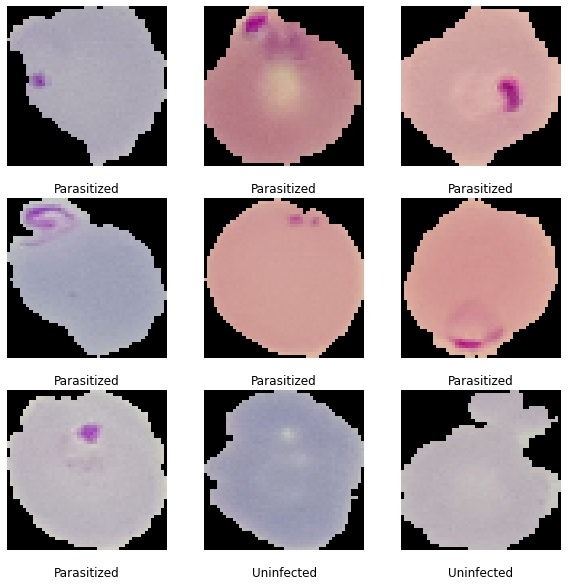

In [ ]:
import matplotlib.pyplot as plt

image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i])
  actu_label = img_config['cls_names'][int(label_batch[i])]
  ax.set_title(f'{actu_label}', y=-0.2)
  plt.axis("off")


In [ ]:
cls_names = list(train_ds.class_indices)
cls_names
img_config = dict(cls_names = cls_names, size = train_ds.target_size )
img_config

{'cls_names': ['Parasitized', 'Uninfected'], 'size': (50, 50)}

In [ ]:

n_cls = len(cls_names)

fm = tf.keras.models.Sequential()
fm.add(Conv2D(64, 3, padding='same', activation='relu', input_shape = (size,size,3) ))
fm.add(Conv2D(64, 3, padding='same', activation='relu'))
fm.add(MaxPool2D())

fm.add(Conv2D(32, 3, padding='same', activation='relu'))
fm.add(MaxPool2D())

fm.add(Flatten())

fm.add(Dense(64,  activation='relu'))
fm.add(Dropout(0.20))
#op
fm.add(Dense(n_cls, activation='softmax'))


fm.compile(optimizer='adam', 
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
           metrics=['accuracy'])

PATH = "/content/drive/MyDrive/models/MLRA_V1.h5"
chkpt = tf.keras.callbacks.ModelCheckpoint(PATH, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
H =  fm.fit(
    train_ds,
    validation_data=val_ds,
    verbose=1,
    # steps_per_epoch=spe,
    # validation_steps = vspe,
    batch_size=32,
    callbacks = [chkpt],
    epochs=20)


Epoch 1/20
689/689 [==============================] - 33s 48ms/step - loss: 0.3284 - accuracy: 0.8544 - val_loss: 0.1430 - val_accuracy: 0.9514

Epoch 00001: val_accuracy improved from -inf to 0.95138, saving model to /content/drive/MyDrive/models/MLRA_V1.h5
Epoch 2/20
689/689 [==============================] - 33s 47ms/step - loss: 0.1462 - accuracy: 0.9529 - val_loss: 0.1350 - val_accuracy: 0.9561

Epoch 00002: val_accuracy improved from 0.95138 to 0.95610, saving model to /content/drive/MyDrive/models/MLRA_V1.h5
Epoch 3/20
689/689 [==============================] - 33s 48ms/step - loss: 0.1307 - accuracy: 0.9569 - val_loss: 0.1281 - val_accuracy: 0.9546

Epoch 00003: val_accuracy did not improve from 0.95610
Epoch 4/20
689/689 [==============================] - 33s 47ms/step - loss: 0.1172 - accuracy: 0.9600 - val_loss: 0.1366 - val_accuracy: 0.9485

Epoch 00004: val_accuracy did not improve from 0.95610
Epoch 5/20
689/689 [==============================] - 32s 47ms/step - loss: 0.1

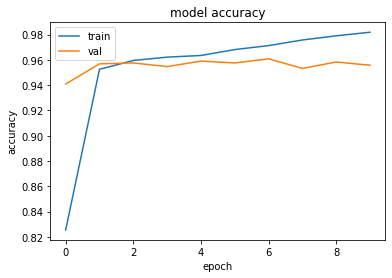

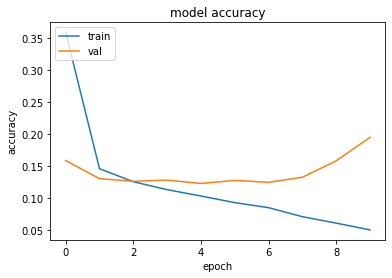

In [ ]:
history = H
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_model = tf.keras.models.load_model(PATH)
test_model.evaluate(val_ds)


87/87 [==============================] - 3s 37ms/step - loss: 0.1244 - accuracy: 0.9608


[0.12444332242012024, 0.9608127474784851]

In [ ]:

fm.evaluate(val_ds)

87/87 [==============================] - 3s 37ms/step - loss: 0.1947 - accuracy: 0.9557


[0.19473512470722198, 0.9557329416275024]

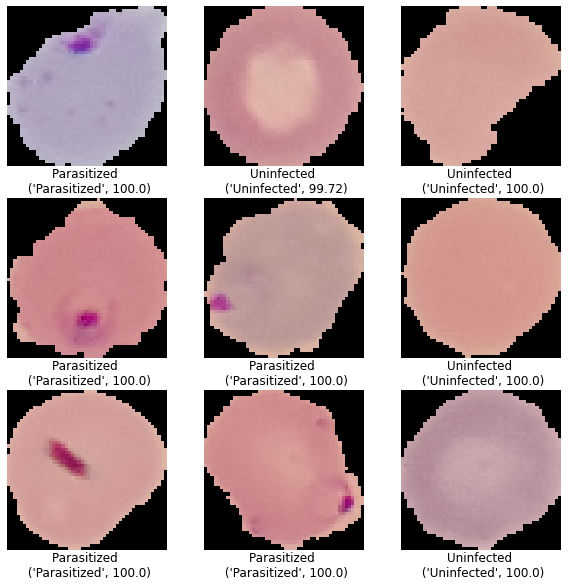

In [ ]:
def plt_pred(model_name, IMG, conf_file):
    img = np.expand_dims(IMG, axis=0)
    pred = model_name.predict(img)
    score = np.max(pred)*100
    result = np.argmax(pred)
    cls_names = conf_file['cls_names']
    result = cls_names[result]
    score = round(score,2)
    return result,score


import numpy as np
import matplotlib.pyplot as plt

image_batch, label_batch = next(iter(val_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i])
  actu_label = img_config['cls_names'][int(label_batch[i])]
  pred_l = plt_pred(fm, image_batch[i], img_config)
  ax.set_title(f'{actu_label} \n {pred_l}', y=-0.2)
  plt.axis("off")




In [ ]:
import joblib
joblib.dump(img_config,'ml_config.pkl')

['ml_config.pkl']